In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
import re
import seaborn as sns
%matplotlib inline

In [2]:
respondent = pd.read_csv("atusresp_2013/atusresp_2013.dat")
weight = respondent[["TUCASEID", "TRSPPRES", "TUFINLWGT"]]

activity_sum = pd.read_csv("atussum_2013/atussum_2013.dat")
activity_sum = activity_sum.rename(columns = {"tucaseid": "TUCASEID"})

roster = pd.read_csv("atusrost_2013/atusrost_2013.dat")

activity = pd.read_csv("atusact_2013/atusact_2013.dat")

needed_data = pd.merge(respondent, activity_sum, how="inner", on="TUCASEID")
needed_data = pd.merge(needed_data, weight, how="inner", on="TUCASEID")

In the above cell I am organizing the data which I may need into a single file so that I can easily access it all.

In [3]:
needed_data = needed_data[needed_data["TRERNWA_y"] != -1]
needed_data['TRERNWA_y'] = needed_data.TRERNWA_y/100
needed_data["earned_per_year"] = needed_data.TRERNWA_y * 52

In this cell I am doing three things. First I am getting rid of any person who did not put down their weekly salary, represented by a -1. Next I am dividing their weekly salary by 100 as in the manual it states that there is an implied decimal point there, and finaly I am multiplying the amount by 52 so as to get a yearly salary

In [4]:
ws = needed_data[["TUCASEID", 'earned_per_year', "TUFINLWGT_x", 't130202', 't130203', 't130205', 't130206', 't130207', 
                  't130210', 't130213', 't130215', 't130216', 't130218', 't130219', 't130220', 't130221', 
                  't130222', 't130223', 't130224', 't130225', 't130226', 't130227', 't130229', 't130232']]
ws = ws.rename(columns={"TUCASEID": "ID", "TUFINLWGT_x": "weight", 't130202': "baseball", 't130203': "basketball", 
                        't130205': "billiards", 't130206': "boating", 't130207': "bowling", 
                        't130210': "equestrian", 't130213': "football", 't130215': "gymnastics", 't130216': "hockey", 
                        't130218': "racquet", 't130219': "rodeo", 't130220': "rollerblading", 't130221': "rugby", 
                        't130222': "running", 't130223': "winter_sports", 't130224': "soccer", 't130225': "softball", 
                        't130226': "racing", 't130227': "volleyball", 't130229': "water_sports", 
                        't130232': "wrestling"})

ae = needed_data[["TUCASEID", "earned_per_year", "TUFINLWGT_x", "t120401", "t120402"]]
ae = ae.rename(columns={"TUCASEID": "ID", "TUFINLWGT_x": "weight", "t120401": "performing_arts", "t120402": "museums"})

In this cell I am taking out the data that I need. The first dataframe, named 'ws', is how much people watch sports. The second one, 'ae', is how much time people spent at a performing arts show or museum.

In [5]:
ws["minutes_ws"] = (ws.baseball+ws.basketball+ws.billiards+ws.boating+ws.bowling+ws.equestrian+ws.football+
                               ws.gymnastics+ws.hockey+ws.racquet+ws.rodeo+ws.rollerblading+ws.rugby+ws.running+
                               ws.winter_sports+ws.soccer+ws.softball+ws.racing+ws.volleyball+ws.water_sports+
                               ws.wrestling)

ae["minutes_ae"] = (ae.performing_arts+ae.museums)

Here I am adding together all of the time that people spend on these events as I don't want to see the individual events as much as I would want to see the total sum  of time

In [6]:
ws["weighted_minutes_ws"] = ((ws.weight * ws.minutes_ws)/ws.weight.sum())
ae["weighted_minutes_ae"] = ((ae.weight * ae.minutes_ae)/ae.weight.sum())

And here I am creating a new column that is the weighted minutes for each dataframe

In [7]:
ae = ae[["earned_per_year", "minutes_ae", "weighted_minutes_ae"]]
ws = ws[["earned_per_year", "minutes_ws", "weighted_minutes_ws"]]
ae = ae[ae.minutes_ae > 0]
ws = ws[ws.minutes_ws > 0]

This is simply clearing out the extraneous columns from the dataframes so that I can keep the information I need without too much clutter.

/Users/MatthewBarnette/iron_yard_hw/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


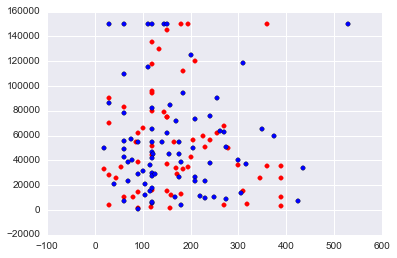

In [8]:
plt.scatter(ae['minutes_ae'], ae['earned_per_year'], color="red")
plt.scatter(ws['minutes_ws'], ws['earned_per_year'])
plt.draw()

This graph shows the minutes spent at performing arts, which are in red, vs the minutes spend watching sports, shown in blue. Interestingly, there does seem to be a trend towards people who have more money spending more time with performing arts, though there are a few exceptions to this trend.

/Users/MatthewBarnette/iron_yard_hw/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


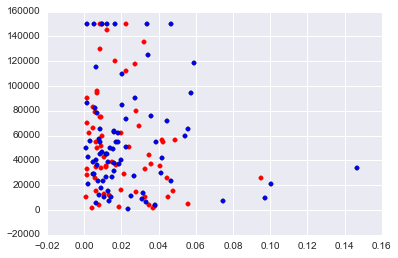

In [9]:
plt.scatter(ae['weighted_minutes_ae'], ae['earned_per_year'], color="red")
plt.scatter(ws['weighted_minutes_ws'], ws['earned_per_year'])
ylabel = "salary per year"
xlabel = "weighted minutes watched"
plt.show()

With the above being said, this one is done with the weighted minutes, and here, it seems that money don't matter as much and that people do seem to watch sports more, though there are plenty of people, no matter what their salary is, who seem to enjoy both.